In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utils
%matplotlib inline

Using TensorFlow backend.


(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)
0.0 1.0 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


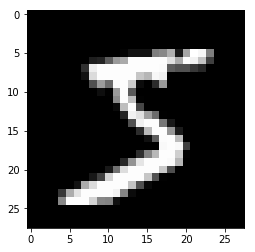

In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')
x_train /= 255
x_train = np.reshape(x_train, x_train.shape + (1,))

x_test = x_test.astype('float32')
x_test /= 255
x_test = np.reshape(x_test, x_test.shape + (1,))

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
plt.imshow(x_train[0].reshape(28,28), cmap='gray')
print(np.min(x_train), np.max(x_train), y_train[0])

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

def create_model(dropout_rate):
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(dropout_rate))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax'))
    return model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

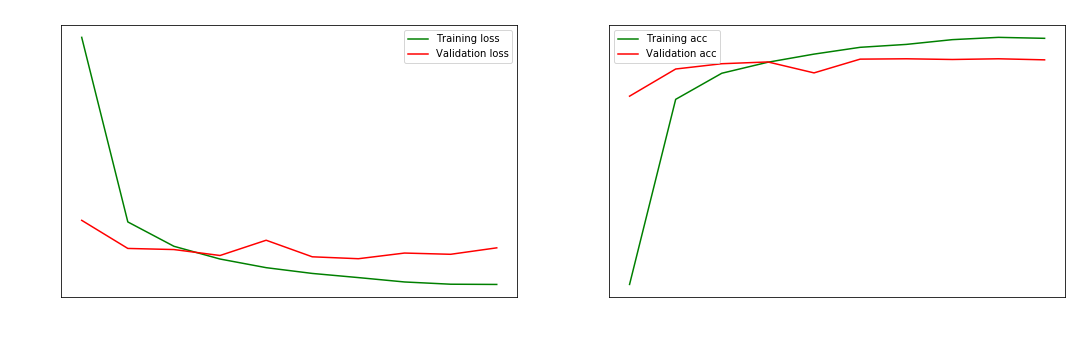

In [6]:
batch_size = 128
epochs = 10
dropout_rate = 0.25

model = create_model(dropout_rate)
model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=0)
utils.plot(history, 'acc')
print('Final validation accuracy:', history.history[f'val_acc'][-1])
print('Final validation loss:', history.history[f'val_loss'][-1])